In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-file/diabetes_file.csv


In [2]:
df= pd.read_csv("/kaggle/input/diabetes-file/diabetes_file.csv")

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
X= df.drop('Outcome', axis=1)
y= df['Outcome']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score
from sklearn import tree 

In [8]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.33)
my_model= DecisionTreeClassifier(random_state= 0)
trained_model= my_model.fit(X_train,y_train)

In [9]:
text_representation = tree.export_text(my_model)
print(text_representation)

|--- feature_1 <= 154.50
|   |--- feature_5 <= 26.95
|   |   |--- feature_5 <= 9.10
|   |   |   |--- feature_7 <= 28.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  28.00
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  9.10
|   |   |   |--- feature_1 <= 138.00
|   |   |   |   |--- feature_6 <= 0.68
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.68
|   |   |   |   |   |--- feature_6 <= 0.68
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  0.68
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  138.00
|   |   |   |   |--- feature_2 <= 56.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  56.00
|   |   |   |   |   |--- class: 0
|   |--- feature_5 >  26.95
|   |   |--- feature_1 <= 99.50
|   |   |   |--- feature_5 <= 50.85
|   |   |   |   |--- feature_6 <= 0.66
|   |   |   |   |   |--- feature_7 <= 51.00
|   |   |   |   |   |   |--- feature_0 <= 11.50
|   |   |   |   |   |   |   |-

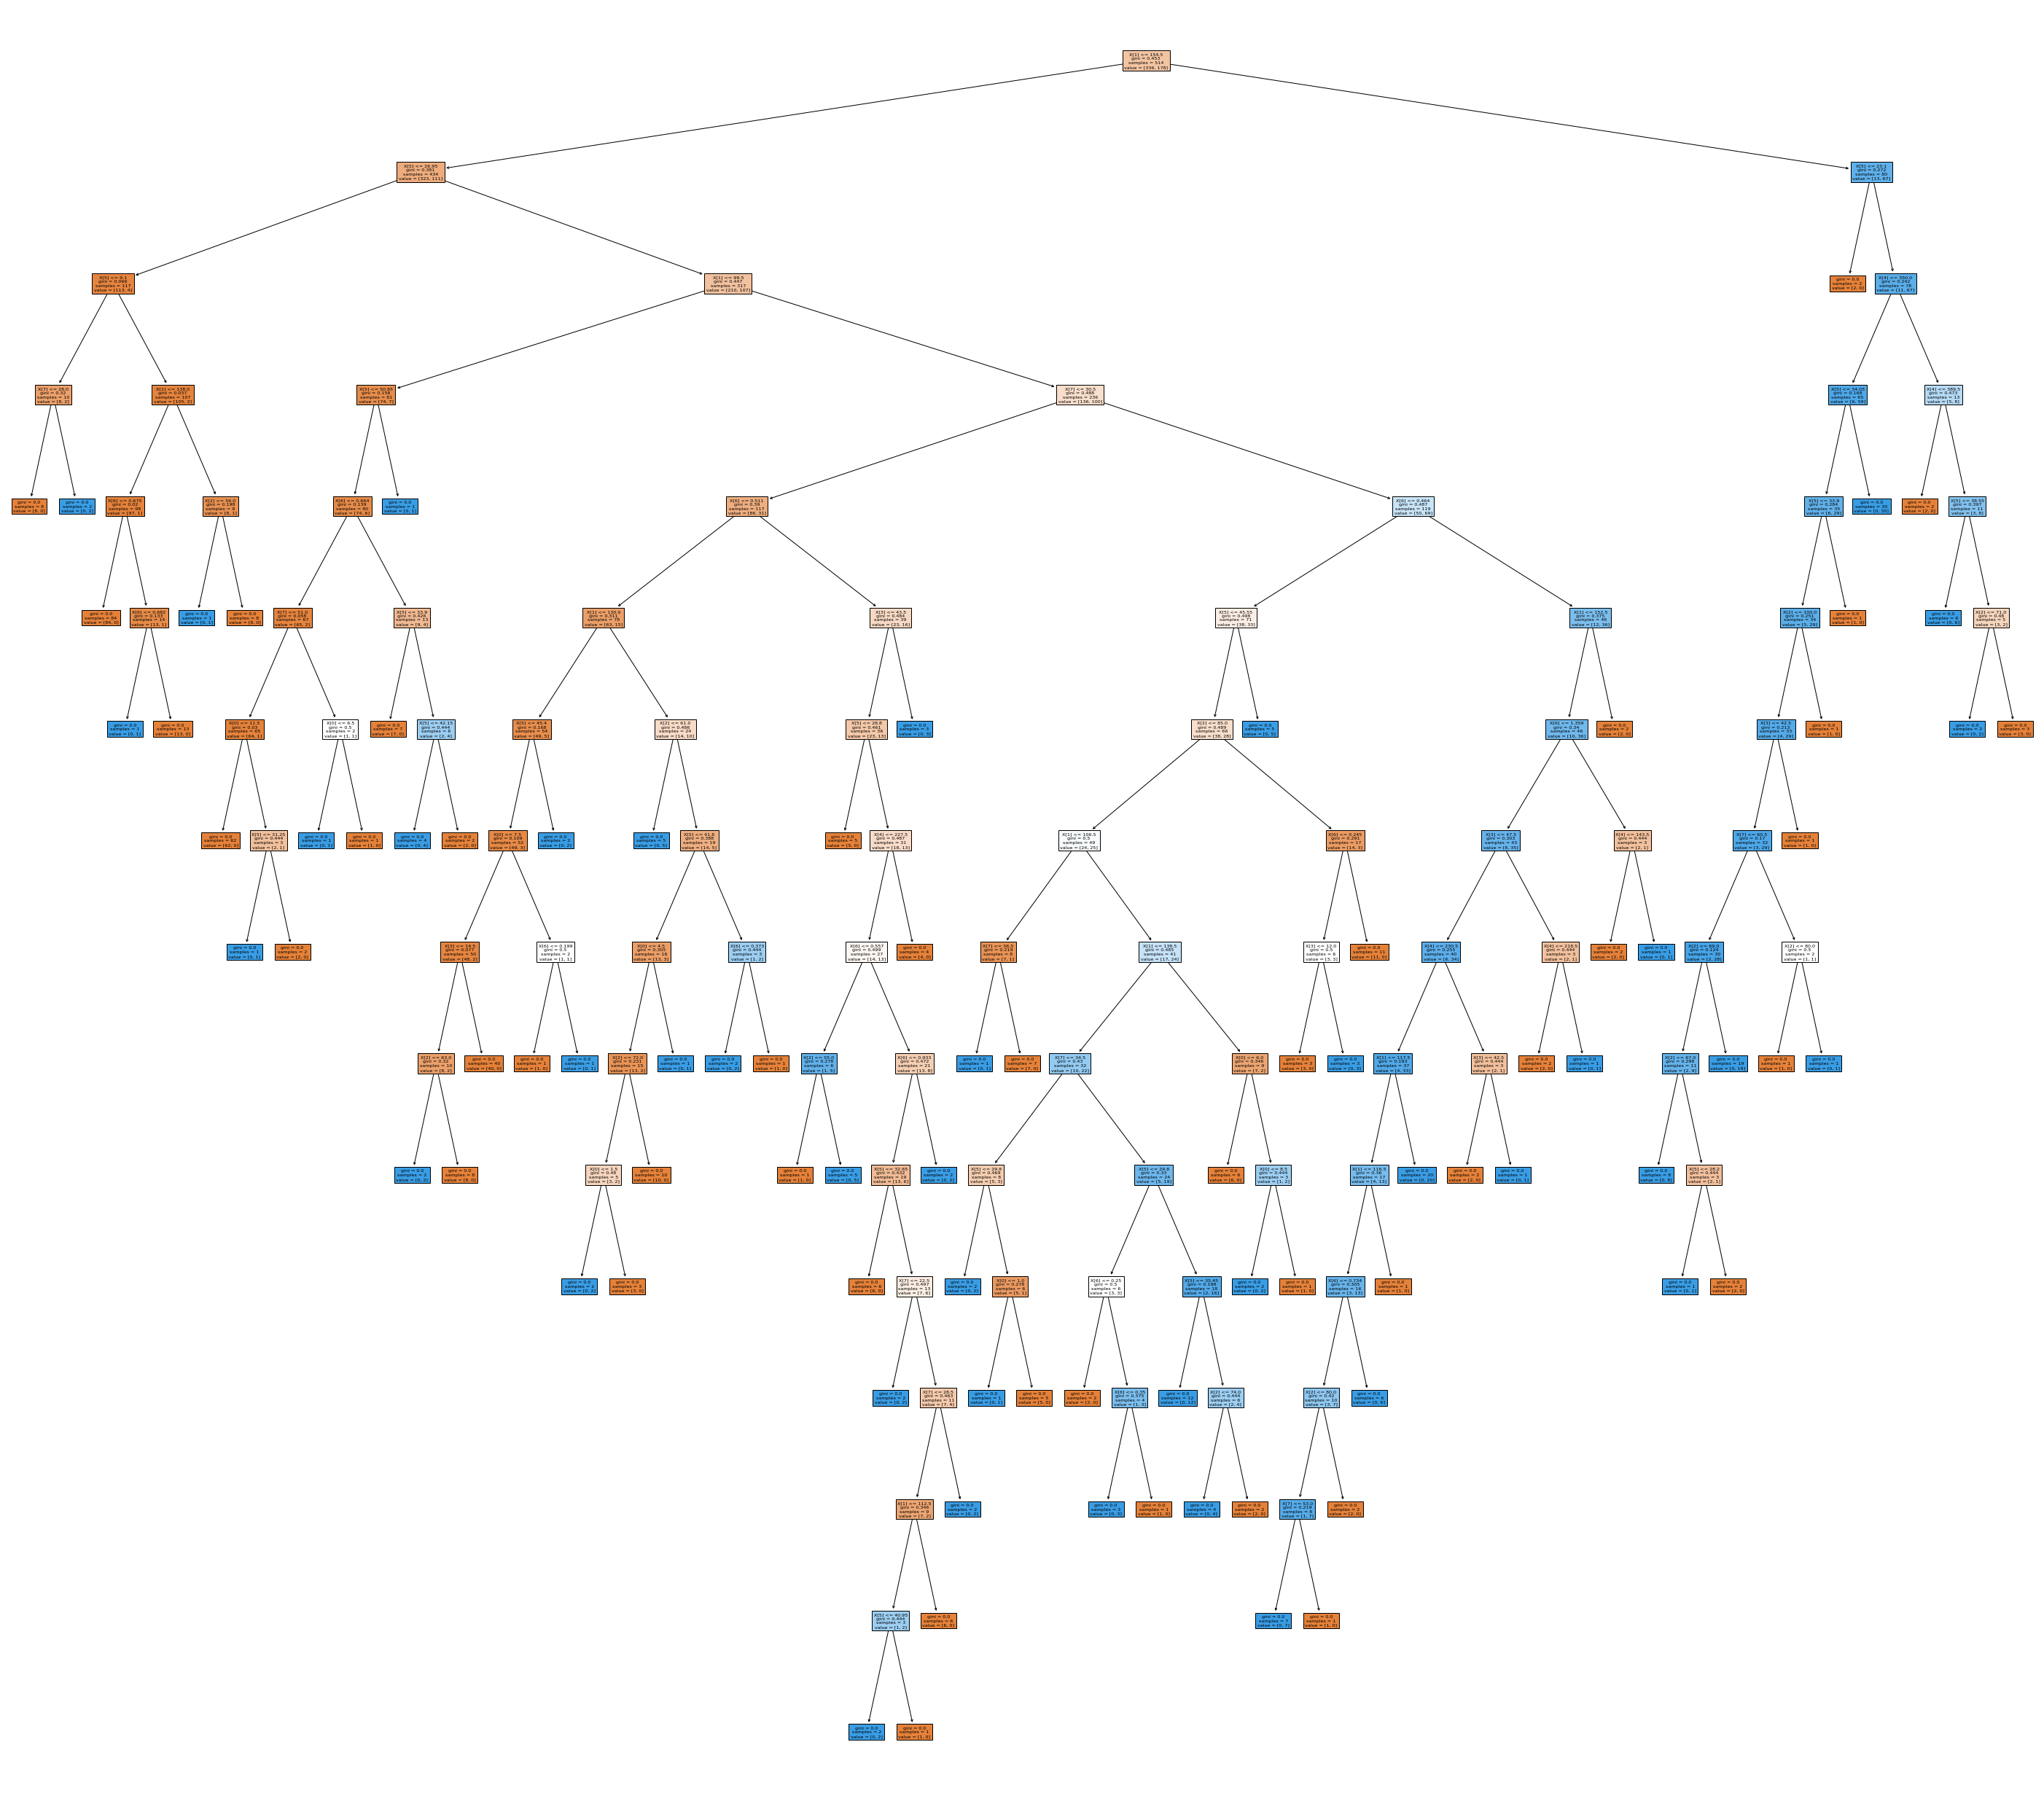

In [10]:
fig = plt.figure(figsize=(50,45))
fig1 = tree.plot_tree(my_model,filled=True)

In [11]:
predictions= my_model.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
error= mean_absolute_error(y_test, predictions)
conf_matrics= confusion_matrix(y_test, predictions)
acc_score= accuracy_score(y_test, predictions)
print("The MAE:",error,"\n","Confusion materics:","\n",conf_matrics ,"\n","Model_accuracy", acc_score)

The MAE: 0.2874015748031496 
 Confusion materics: 
 [[124  40]
 [ 33  57]] 
 Model_accuracy 0.7125984251968503


In [13]:
print("Classification Report:","\n", metrics.classification_report(y_test,predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       164
           1       0.59      0.63      0.61        90

    accuracy                           0.71       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.72      0.71      0.71       254



In [14]:
pred_new=list(trained_model.predict([[6,148,72,35,0,33.6,0.627,50]]))
pred_new

[1]